In [528]:
import pandas as pd
import scipy as sp
import numpy as np
import sklearn as sk
import sklearn.cross_validation as skcv
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.externals.six as sksix
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', color_codes=True, font_scale=1.3)
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pydot_ng as pydot
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore', lineno=590)

# Team Salary vs. Wins Comparison

In [529]:
df_teams = pd.read_csv('lahman-csv_2015-01-24/Teams_real.csv')
df_salaries = pd.read_csv('lahman-csv_2015-01-24/Salaries.csv')

In [530]:
df_teams = df_teams[df_teams['yearID'] >= 1985]
df_teams = df_teams[['yearID', 'teamID', 'lgID', 'R', 'RA', 'W', 'H', 'BB', 'AB', 'HR', '2B', '3B', 'SB', 'name']]

In [531]:
df_teams = df_teams.set_index(['yearID', 'teamID'])

In [532]:
df_teams.tail()

lgID    R   RA   W     H   BB    AB   HR   2B  3B   SB  \
yearID teamID                                                          
2014   SLN      NL  619  603  90  1371  471  5426  105  275  21   57   
       TBA      AL  612  625  77  1361  527  5516  117  263  24   63   
       TEX      AL  637  773  67  1400  417  5460  111  260  28  105   
       TOR      AL  723  686  83  1435  502  5549  177  282  24   78   
       WAS      NL  686  555  96  1403  517  5542  152  265  27  101   

                               name  
yearID teamID                        
2014   SLN      St. Louis Cardinals  
       TBA           Tampa Bay Rays  
       TEX            Texas Rangers  
       TOR        Toronto Blue Jays  
       WAS     Washington Nationals

In [533]:
df_salaries_by_yearID_teamID = df_salaries.groupby(['yearID', 'teamID'])['salary'].sum()
df_teams = df_teams.join(df_salaries_by_yearID_teamID)

In [534]:
df_team_by_year13 = df_teams.xs(2013, level='yearID')
df_team_by_year97 = df_teams.xs(1997, level='yearID')
df_team_by_year01 = df_teams.xs(2001, level='yearID')
df_team_by_year02 = df_teams.xs(2002, level='yearID')
df_team_by_year07 = df_teams.xs(2007, level ='yearID')
df_team_by_year10 = df_teams.xs(2010, level ='yearID')

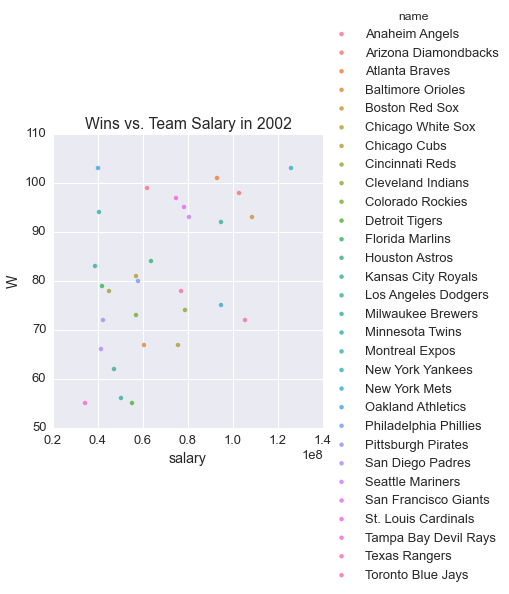

In [535]:
sns.lmplot(x='salary', y='W',
                  data=df_team_by_year02, hue= 'name', fit_reg=False)
plt.title('Wins vs. Team Salary in 2002')


When comparing teams win in one season, here in 2002, against the team's total salary, this scatterplot shows that overall there seems to be a positive correlation between team spending and team wins. The more teams spend, or the higher their salary, the more wins they have. However this is not always the case as the scatterplot does show some outliers, such as the Oakland A's, who won a lot of games but spent very little to do so. 

In [538]:
Wins = df_team_by_year02['W']
Salary = df_team_by_year02['salary']
model1 = smf.ols('W ~ Salary', data=df_team_by_year02).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     6.814
Date:                Mon, 14 Dec 2015   Prob (F-statistic):             0.0144
Time:                        21:45:12   Log-Likelihood:                -119.54
No. Observations:                  30   AIC:                             243.1
Df Residuals:                      28   BIC:                             245.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     62.9986      7.261      8.676      0.000        48.125    77.872
Salary      2.643e-07   1.01e-07      2.610      0.014      5.69e-08  4.72e-07
==============================================================================
Omnibus:                        0.577   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.650
Skew:                           0.109   Prob(JB):                        0.723
Kurtosis:                       2.313   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [539]:
# Find outliers using Cook's Distance
influence = model1.get_influence()
cooks_distance = influence.cooks_distance[0]
number_of_observations = len(df_team_by_year02)

# Use an empirical threshold value
cooks_threshold = 4 / number_of_observations

# Show outliers
df_team_by_year02[cooks_distance > cooks_threshold]


,lgID,R,RA,W,H,BB,AB,HR,2B,3B,SB,name,salary
teamID,,,,,,,,,,,,,
OAK,AL,800,654,103,1450,609,5558,205,279,28,46,Oakland Athletics,40004167
TEX,AL,843,882,72,1510,554,5618,230,304,27,62,Texas Rangers,105526122


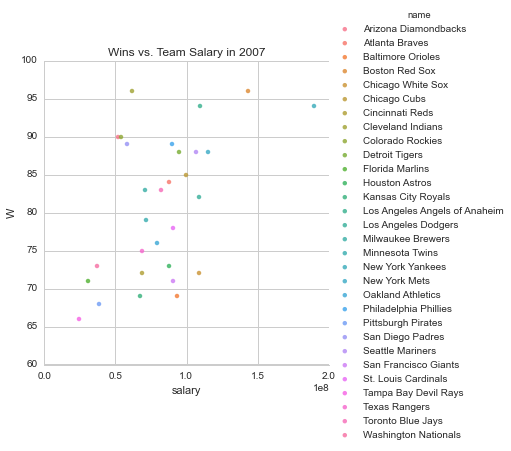

In [583]:
sns.lmplot(x='salary', y='W',
                  data=df_team_by_year07, hue= 'name', fit_reg=False)
plt.title('Wins vs. Team Salary in 2007')

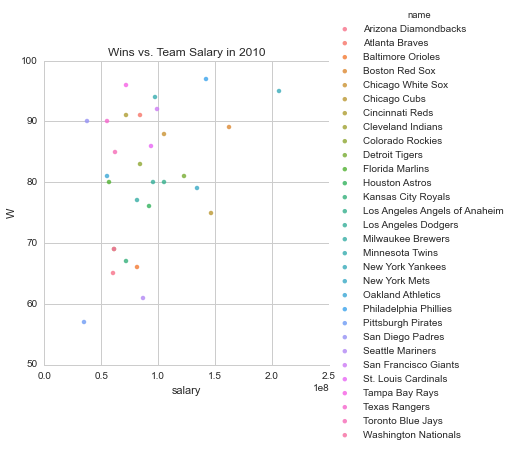

In [584]:
sns.lmplot(x='salary', y='W',
                  data=df_team_by_year10, hue= 'name', fit_reg=False)
plt.title('Wins vs. Team Salary in 2010')

I included two other scatterplots showing the same comparison but different years to see if the trend was the same. It does appear that there is a positive correlation between team salary and wins. 

After building this regression model and using the metric Cook's Distance to find and show any outliers, two teams are produced in the table above. Oakland is one because as mentioned above, they won many games with very little spending on salary, while Texas is the other. They are an outlier for a different reason as the team won very few games for the amount of money they spent. 

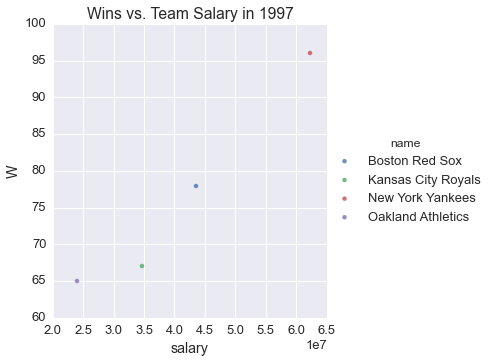

In [540]:
grid = sns.lmplot('salary', 'W',
                  data=df_team_by_year97, hue= 'name', fit_reg=False)
plt.title('Wins vs. Team Salary in 1997')

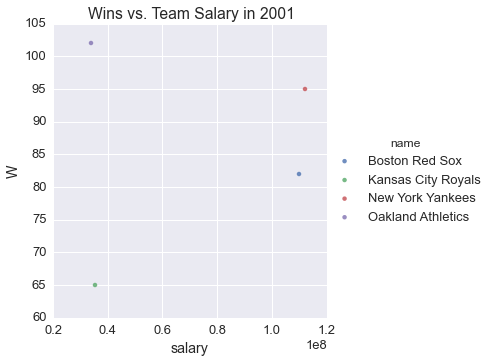

In [541]:
grid = sns.lmplot('salary', 'W',
                  data=df_team_by_year01, hue= 'name', fit_reg=False)
plt.title('Wins vs. Team Salary in 2001')

The two scatter plots above show a comparison of only a few teams to get an idea of the differences between the relationship of salary and wins for different ball clubs. Usually, teams with low payrolls are not as successful, as the Royals and A's show in 1997, whereas the Yankees had a very high payroll and won a lot of games. However in the second plot, we see that the A's increased their wins while not increasing their spending. I will explain how they were able to do so below. 

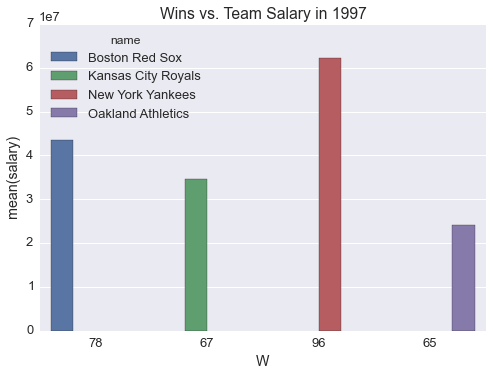

In [542]:
sns.barplot(x='W', y='salary', 
            data=df_team_by_year97,
            hue = 'name'
            );
plt.title('Wins vs. Team Salary in 1997')

# Here is another visualization of the same data above, but in bar chart form.

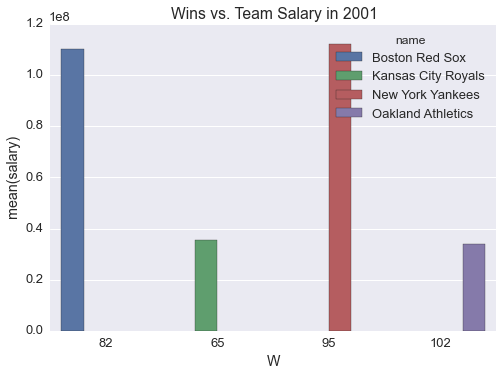

In [543]:
sns.barplot(x='W', y='salary', 
            data=df_team_by_year01,
            hue = 'name'
            );
plt.title('Wins vs. Team Salary in 2001')

# Here is another visualization of the same data above, but in bar chart form. We see the A's increased their win 
# total from 65 in 1997 to 102 in 2001.

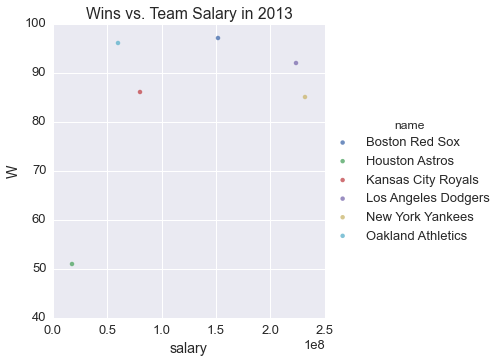

In [544]:
grid = sns.lmplot('salary', 'W',
                  data=df_team_by_year13, hue= 'name', fit_reg=False)
plt.title('Wins vs. Team Salary in 2013')

# Again, another plot of salary vs. wins. While teams like the Dodgers, Yankees, and Red Sox show spending can lead to
# wins, the A's and Royals found a way to produce high win totals without spending nearly as much on payroll. 

# Correlation of On Base Percentage (OBS) Metrics (H,BB,HBP) with Runs Scored

In [545]:
df_obs = pd.read_csv('lahman-csv_2015-01-24/Teams_unmodified.csv')

In [546]:
df_obs = df_obs[df_obs['yearID'] >= 1985]
df_obs = df_obs[['yearID', 'teamID', 'R', 'RA', 'W', 'H', 'BB', 'AB', 'HR', '2B', '3B', 'SB', 'CS', 'HBP']]

In [547]:
df_obs.tail()

,yearID,teamID,R,RA,W,H,BB,AB,HR,2B,3B,SB,CS,HBP
2770,2014,SLN,619,603,90,1371,471,5426,105,275,21,57,32,86
2771,2014,TBA,612,625,77,1361,527,5516,117,263,24,63,27,66
2772,2014,TEX,637,773,67,1400,417,5460,111,260,28,105,59,61
2773,2014,TOR,723,686,83,1435,502,5549,177,282,24,78,21,41
2774,2014,WAS,686,555,96,1403,517,5542,152,265,27,101,23,56


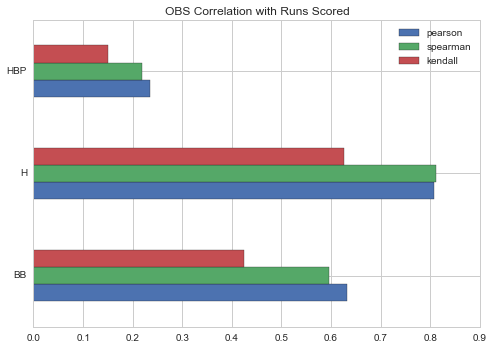

In [548]:
corr_metrics = ['pearson', 'spearman', 'kendall']
other_measurements = ['BB','H', 
                      'HBP']
cols = {m: [df_obs['R'].corr(df_obs[x], method=m) 
            for x in other_measurements] 
        for m in corr_metrics}
df_corr = pd.DataFrame(cols, index=other_measurements,
                       columns=corr_metrics)
sns.set(style='whitegrid')
df_corr.plot(kind='barh', 
             title='OBS Correlation with Runs Scored');

# As expected, metrics that contribute to on base percentage are positively correlated with Runs Scored.
# Do these metrics also have a positive correlation with wins?

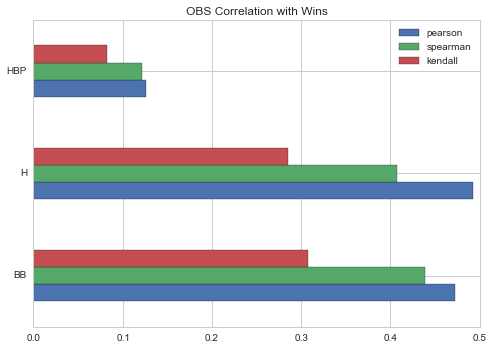

In [549]:
corr_metrics = ['pearson', 'spearman', 'kendall']
other_measurements = ['BB','H', 
                      'HBP']
cols = {m: [df_obs['W'].corr(df_obs[x], method=m) 
            for x in other_measurements] 
        for m in corr_metrics}
df_corr = pd.DataFrame(cols, index=other_measurements,
                       columns=corr_metrics)
sns.set(style='whitegrid')
df_corr.plot(kind='barh', 
             title='OBS Correlation with Wins');

# These OBS metrics do also have a positive correlation with wins.

# Correlation Matrix Highlighting Common Batting Statistics 

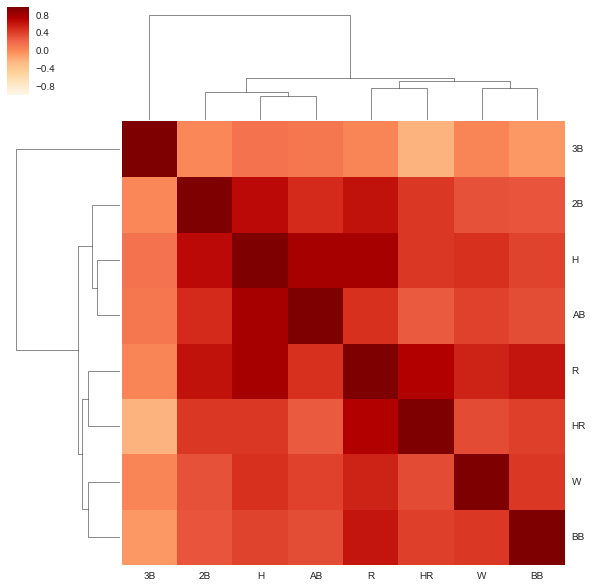

In [550]:
df_teams = df_teams[['R', 'W', 'H', 'BB', 'AB', 'HR', '2B', '3B']]
sns.clustermap(df_teams.corr(), cmap=plt.cm.OrRd)

This correlation matrix shows the relationship between different common batting statistics. As expected, things like runs scored and home runs are highly correlated as are runs scored and wins. Other highly correlated relationships include doubles hit and runs scored as well as hits and runs scored, which are both to be expected. The most interesting note is that walks seem to be more correlated with wins than home runs are. This gives credence to the idea that the more you get on base the more you win, as shown in the correlation metrics and charts above. 

A question that I had was if OBS metrics have a positive correlation with runs and wins, than do the number of stolen bases show this as well?

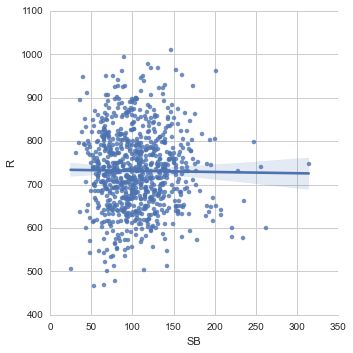

In [551]:
sns.lmplot(x='SB', y='R', data=df_obs,
           truncate=True);

This scatter plot and regression line show us that stolen bases seem to have a slightly negative correlation with runs scored.

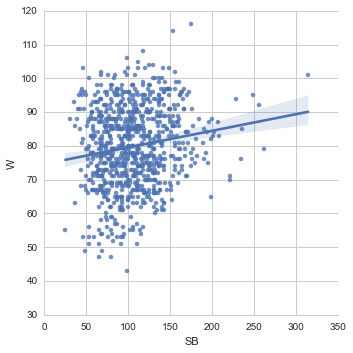

In [552]:
sns.lmplot(x='SB', y='W', data=df_obs,
           truncate=True);

However here, we see from this scatter plot and regression line that stolen bases seem to have a positive correlation with wins. 

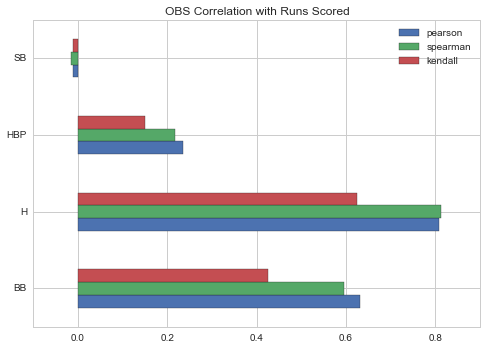

In [553]:
corr_metrics = ['pearson', 'spearman', 'kendall']
other_measurements = ['BB','H', 
                      'HBP', 'SB']
cols = {m: [df_obs['R'].corr(df_obs[x], method=m) 
            for x in other_measurements] 
        for m in corr_metrics}
df_corr = pd.DataFrame(cols, index=other_measurements,
                       columns=corr_metrics)
sns.set(style='whitegrid')
df_corr.plot(kind='barh', 
             title='OBS Correlation with Runs Scored');

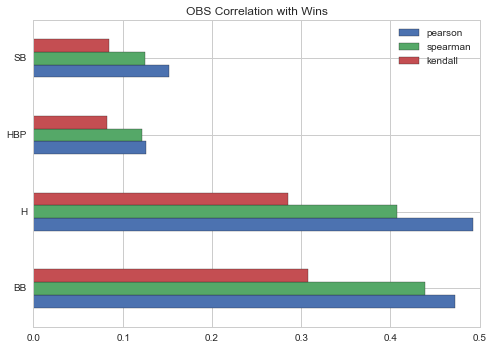

In [554]:
corr_metrics = ['pearson', 'spearman', 'kendall']
other_measurements = ['BB','H', 
                      'HBP', 'SB']
cols = {m: [df_obs['W'].corr(df_obs[x], method=m) 
            for x in other_measurements] 
        for m in corr_metrics}
df_corr = pd.DataFrame(cols, index=other_measurements,
                       columns=corr_metrics)
sns.set(style='whitegrid')
df_corr.plot(kind='barh', 
             title='OBS Correlation with Wins');

This interestingly shows us that stolen bases have a negative correlation with runs scored but a positive correlation with wins is also shown in the above two plots. 

# Average Win Comparison Among Divisions in the American League since 1998

In [555]:
df_wins = pd.read_csv('lahman-csv_2015-01-24/Teams_unmodified.csv')

In [556]:
df_wins = df_wins[df_wins['yearID'] >= 1998]
df_wins = df_wins[['yearID', 'teamID', 'W', 'lgID', 'divID', 'DivWin','LgWin', 'WSWin']]

In [557]:
df_wins_sorted = df_wins.sort(['lgID','divID'])
df_wins_div = df_wins_sorted[df_wins_sorted.lgID != 'NL']

In [558]:
df_wins_div.head()

,yearID,teamID,W,lgID,divID,DivWin,LgWin,WSWin
2270,1998,CHA,80,AL,C,N,N,N
2273,1998,CLE,89,AL,C,Y,N,N
2275,1998,DET,65,AL,C,N,N,N
2278,1998,KCA,72,AL,C,N,N,N
2281,1998,MIN,70,AL,C,N,N,N


In [559]:
df_wins_sorted['E'] = np.where(df_wins_sorted['divID']=='E', '1', '0')


In [560]:
df_wins_sorted2 = df_wins_sorted[df_wins_sorted.E != '0']

In [561]:
df_wins_sorted3 = df_wins_sorted2[df_wins_sorted2.lgID != 'NL']

In [562]:
df_wins_sorted3.head()

,yearID,teamID,W,lgID,divID,DivWin,LgWin,WSWin,E
2268,1998,BAL,79,AL,E,N,N,N,1
2269,1998,BOS,92,AL,E,N,N,N,1
2283,1998,NYA,114,AL,E,Y,Y,Y,1
2292,1998,TBA,63,AL,E,N,N,N,1
2294,1998,TOR,88,AL,E,N,N,N,1


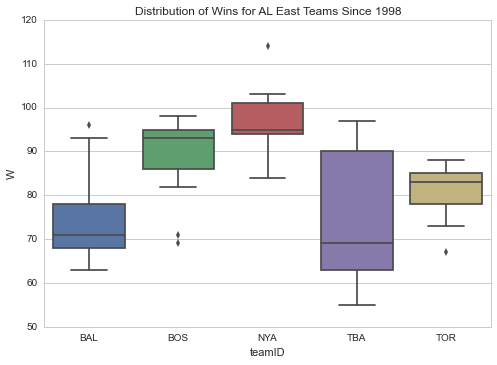

In [563]:
sns.boxplot(x='teamID', y='W', 
            data=df_wins_sorted3,
            );
plt.title('Distribution of Wins for AL East Teams Since 1998')

These box plots show the average number of wins for each team in the AL East, as well as their distribution over this time period. This shows that some teams have been more consistent than others, with smaller ranges like the Yankees and Red Sox while we can see that the Rays have had win totals under 60 and some over 80 or the largest middle 50% quartile. A very high level observation from this plot shows us that the Yankees have been the most successful in terms of wins since 1998, with the Red Sox, Blue Jays, Orioles, and Rays following, respectively. 

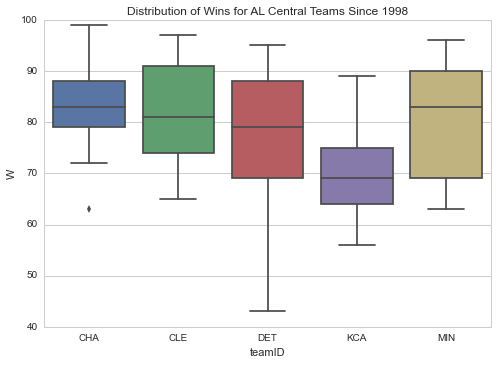

In [564]:
df_wins_sorted['C'] = np.where(df_wins_sorted['divID']=='C', '1', '0')
df_wins_central = df_wins_sorted[df_wins_sorted.C != '0']
df_wins_ALcentral = df_wins_central[df_wins_central.lgID != 'NL']
sns.boxplot(x='teamID', y='W', 
            data=df_wins_ALcentral,
            );
plt.title('Distribution of Wins for AL Central Teams Since 1998')

I did the same comparison with the AL Central as well. We can see from this that these teams have been more similar in win totals over this time than the AL East was. We can see that the Tigers have had the most variation over this time in wins, as their plot is the tallest here. 

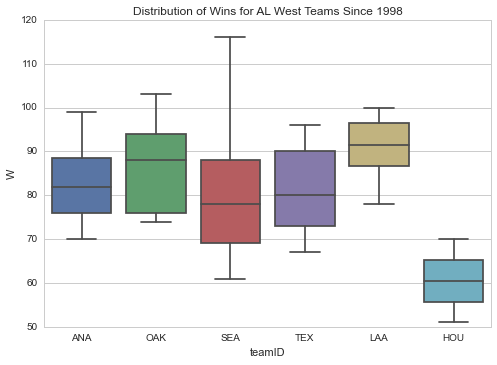

In [565]:
df_wins_sorted.head()
df_wins_AL= df_wins_sorted[df_wins_sorted.lgID != 'NL']
df_wins_ALwest = df_wins_AL[df_wins_AL.divID != 'E']
df_wins_ALwest2 = df_wins_ALwest[df_wins_ALwest.divID != 'C']
sns.boxplot(x='teamID', y='W', 
            data=df_wins_ALwest2,
            );
plt.title('Distribution of Wins for AL West Teams Since 1998')

Finally, the same was done for the AL west. I did this to compare the competitiveness of each American League division. The west more resembles the central in that regard, with the outlier being Houston, as they only joined the division in 2013. Here Seattle had the most fluctuation as in 2001 they won a record number of games. 

In [566]:
AL_East_average = df_wins_sorted3['W'].mean()
print (AL_East_average)

83.10588235294118


In [567]:
AL_Central_average = df_wins_ALcentral['W'].mean()
print (AL_Central_average)

78.28235294117647


In [568]:
AL_West_average = df_wins_ALwest2['W'].mean()
print (AL_West_average)

83.42857142857143


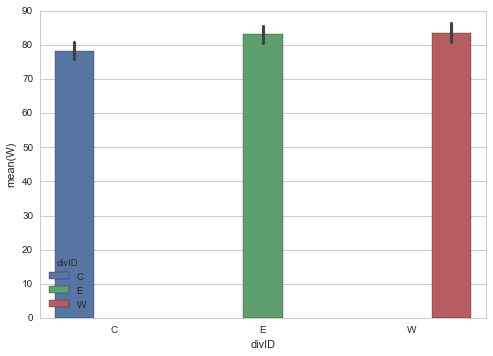

In [569]:
sns.barplot(x='divID', y='W', 
            data=df_wins_div,
            hue='divID');

Here is bar chart comparison of the average win totals of all teams from each respective division. I thought it would be interesting to compare which division had the best teams over this time, however it is very close. The AL East and AL West have nearly identical win averages whereas the Central was slightly lower but not significantly so. 

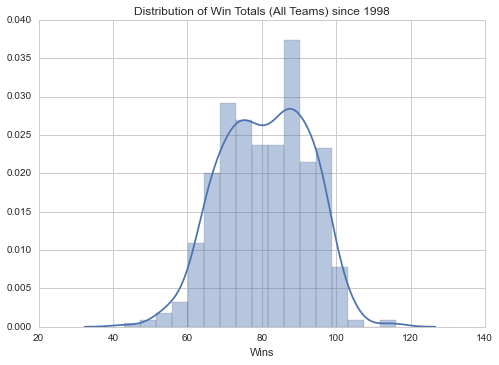

In [570]:
sns.distplot(df_wins['W']) 
plt.xlabel('Wins')
plt.title("Distribution of Win Totals (All Teams) since 1998")

In [571]:
df_wins['W'].mean()

80.96666666666667

I thought it would be cool to see the average win total for all MLB teams since 1998 and look at the distribution it follows. With some outliers, it is close to resembling a normal distribution and we can see the average win total is around 81 wins. 

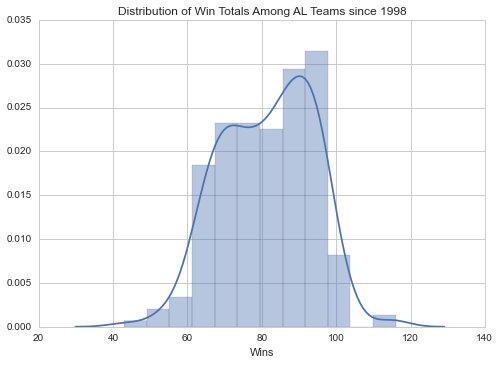

In [572]:
df_wins_AL= df_wins[df_wins.lgID != 'NL']
sns.distplot(df_wins_AL['W']) 
plt.xlabel('Wins')
plt.title("Distribution of Win Totals Among AL Teams since 1998")

In [573]:
df_wins_AL['W'].mean()

81.49166666666666

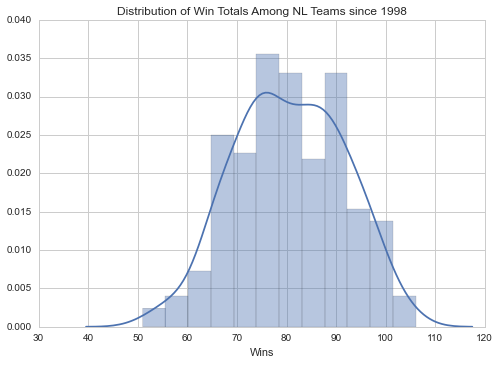

In [574]:
df_wins_NL= df_wins[df_wins.lgID != 'AL']
sns.distplot(df_wins_NL['W']) 
plt.xlabel('Wins')
plt.title("Distribution of Win Totals Among NL Teams since 1998")

In [575]:
df_wins_NL['W'].mean()

80.5

Breaking this down into each respective league once more, I wanted to see if there was a difference in the average number of wins for each league to see if one was more dominant than the other. The averages again were very close, with the AL being slightly better. From the histograms, it looks as if there is more variation in the National League.

In [576]:
df_wins61 = pd.read_csv('lahman-csv_2015-01-24/Teams_unmodified.csv')
df_wins61 = df_wins61[df_wins61['yearID'] >= 1961]

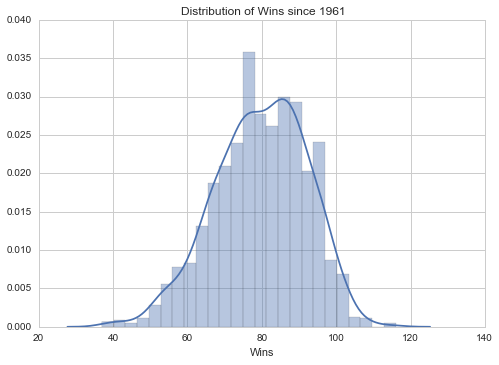

In [577]:
sns.distplot(df_wins61['W']) 
plt.xlabel('Wins')
plt.title("Distribution of Wins since 1961")

In [578]:
df_wins61['W'].mean()

79.67725988700565

This shows us that since 1961, the year when MLB started to play 162 regular season games in both leagues, the average win total among all teams is 79.677 per year. We can see that it follows a normal distribution. 

# SPLOM Comparison of Batting/Pitching Statistics Between American and National League since the introduction of the DH in 1973 

In [579]:
df_pitch = pd.read_csv('lahman-csv_2015-01-24/Pitching.csv')
df_pitch = df_pitch[df_pitch['yearID'] >= 1973]

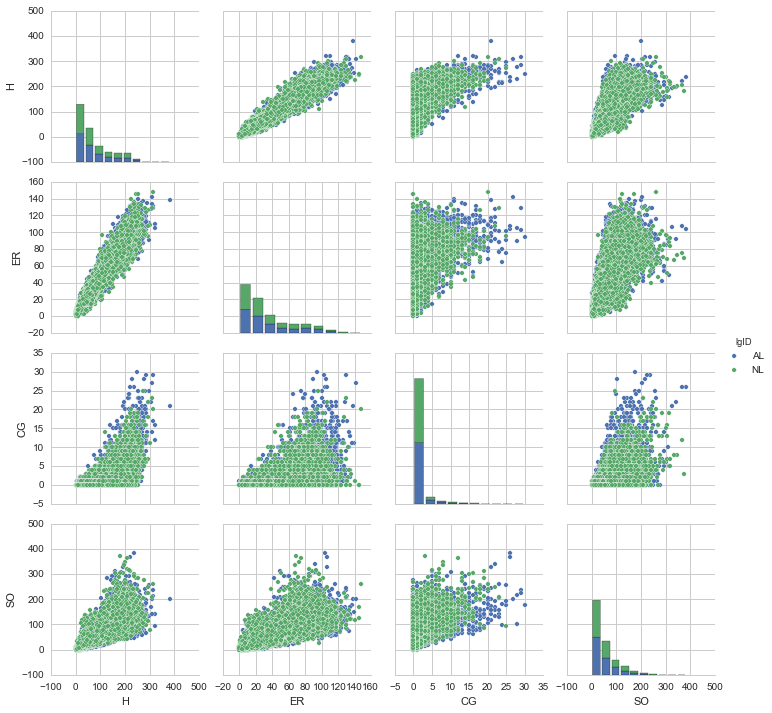

In [580]:
df_pitch = df_pitch[['H','ER','CG',
                 'SO', 'lgID']].dropna()
df_pitch
sns.pairplot(df_pitch, hue='lgID');

Finally, I thougth it would be interesting to look at SPLOM comparisons of different batting and pitching stats for each respective league. The AL is typically regarded as a stronger hitting league as it includes a DH, whereas the NL has the pitcher bat. Because of this, I expected to potentially see stronger correlations among the selected batting statistics in the American League and stronger correlations among the selected pitching statistics in the National League. For the most part, these differences are minimal, or at least insignificant from these comparisons which was disappointing but perhaps another comparison/visualization technique would show clearer differences. 

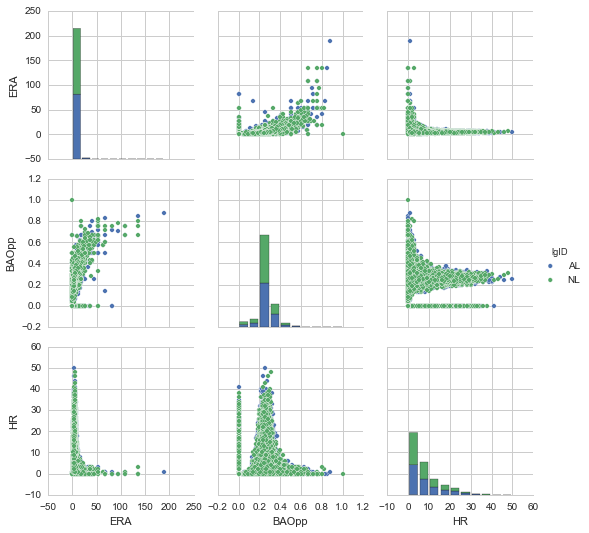

In [581]:
df_pitch = pd.read_csv('lahman-csv_2015-01-24/Pitching.csv')
df_pitch = df_pitch[df_pitch['yearID'] >= 1973]

df_pitch = df_pitch[['ERA','BAOpp','HR',
                  'lgID']].dropna()
df_pitch
sns.pairplot(df_pitch, hue='lgID');

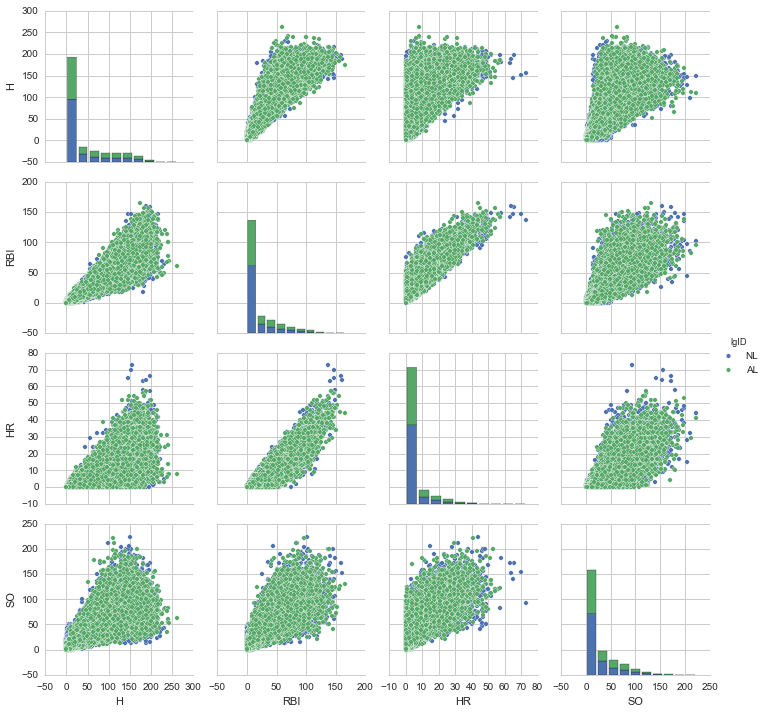

In [582]:
df_bat = pd.read_csv('lahman-csv_2015-01-24/Batting.csv')
df_bat = df_bat[df_bat['yearID'] >= 1973]

df_bat = df_bat[['H','RBI','HR','SO',
                  'lgID']].dropna()
df_bat
sns.pairplot(df_bat, hue='lgID');